<a id="contents"></a>

<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;">
Advanced Statistics Homework 4 
</center>  
<center>
Jake Jackson - 2046805 
</center>

## Contents 
  
• [Exercise 1: Community Mobility Open Data](#ex1)  
• [Exercise 2: Random number generators](#ex2)  
• [Exercise 3: Bayesian Inference (Publishing)](#ex3)  
• [Exercise 4: Bayesian Inference (Coin)](#ex4)  

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex1"></a>  

### Exercise 1: Community Mobility Open Data
 
Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19.

The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3– Feb 6, 2020.

In [1]:
ww_mobility <- read.csv(file = 'data/Global_Mobility_Report.csv')
head(ww_mobility)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


### Country 1: United Kingdom

In [2]:
uk<- read.csv(file = 'data/2020_GB_Region_Mobility_Report.csv')
uk<- uk[,3:15] # remove country codes 
uk[is.na(uk)] <- 0
head(uk)

sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-15,-12,-7,-35,-12,-4,2
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-16,-7,-6,-28,-7,-3,1
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-17,10,1,24,-2,-14,2
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-18,7,-1,20,-3,-14,2
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-19,6,-2,8,-4,-14,3
,,0,,0,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-20,5,-2,4,-5,-14,3


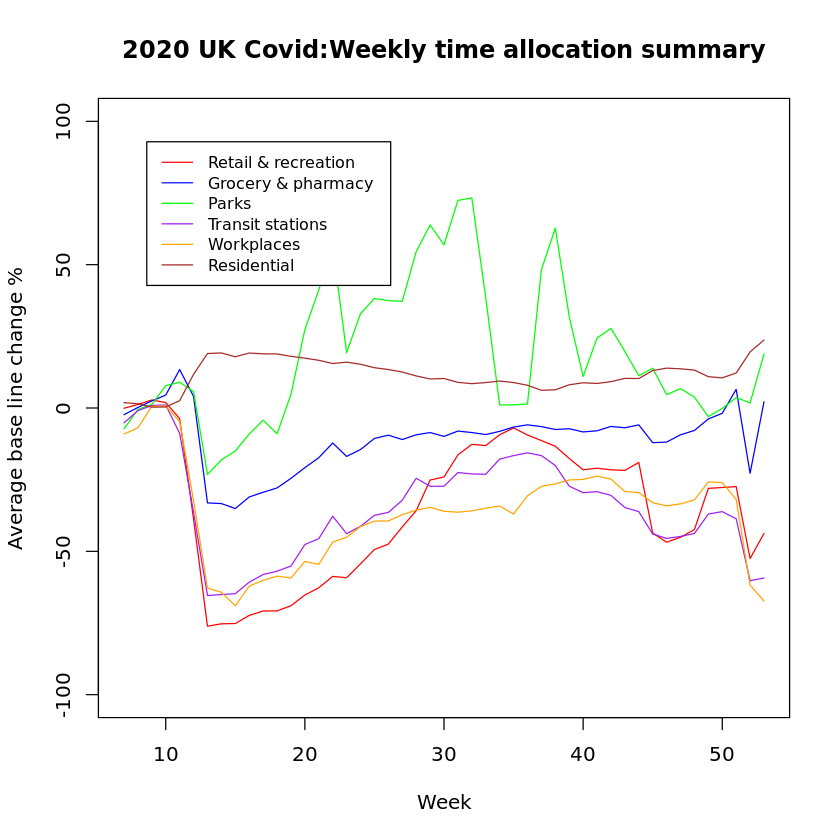

In [4]:
library(lubridate, warn.conflicts = TRUE)
uk[is.na(uk)] <- 0
uk["week"]<- week(uk$date)
uk["month"]<- month(uk$date)

colours<- c("red", "blue", "green", "purple", "orange","brown") 
c<-1
 for (i in 8:13){#selected the ones with the percentage change
    uk_ <- aggregate(uk[i], list(uk$week), FUN=mean)
    if (c==1) {
        plot(uk_[[1]], uk_[[2]] , type ="l",          
             ylim =c(-100,100),
             col = colours[c],
             xlab = "Week",
             ylab = "Average base line change %",
             main = "2020 UK Covid:Weekly time allocation summary"
             )
           }
    else{
        lines(uk_[[1]],uk_[[2]] , type ="l", col = colours[c])
    }
    c<- c+1
}
legend("topleft", 
       inset=0.07, 
       legend=c("Retail & recreation", "Grocery & pharmacy",
               "Parks", "Transit stations",
                "Workplaces", "Residential"
               ),
       col=colours, 
       lty=1:1, 
       cex=0.8,
       box.lty=1)    

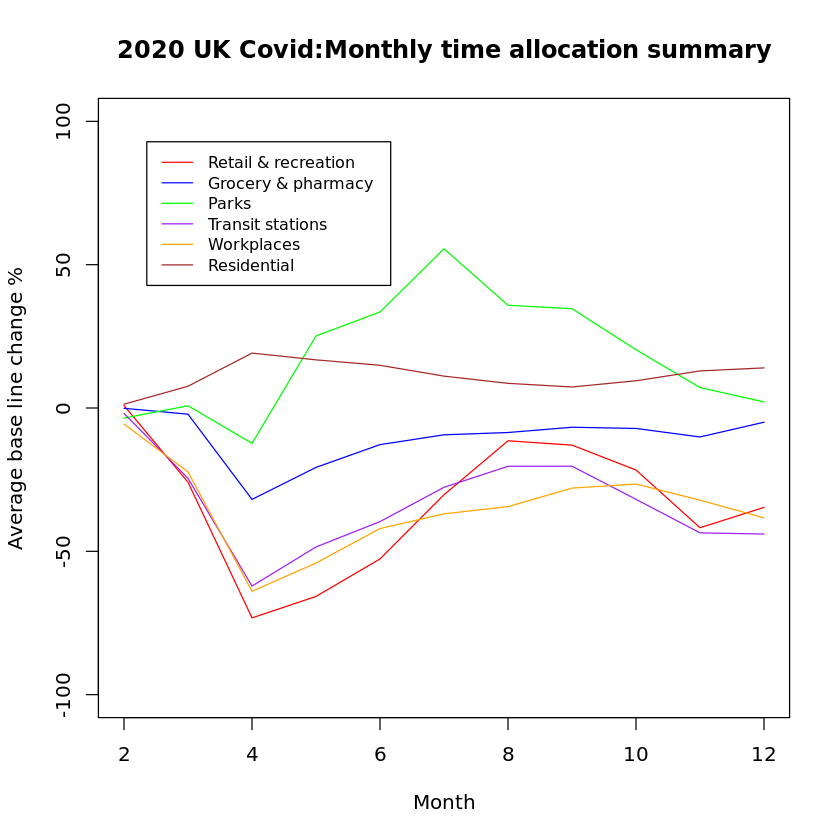

In [5]:
c<-1
 for (i in 8:13){#selected the ones with the percentage change
    uk_ <- aggregate(uk[i], list(uk$month), FUN=mean)
    if (c==1) {
        plot(uk_[[1]], uk_[[2]] , type ="l",
             ylim =c(-100,100),
             col = colours[c],
             xlab = "Month",
             ylab = "Average base line change %",
             main = "2020 UK Covid:Monthly time allocation summary"
             )
           }
    else{
        lines(uk_[[1]],uk_[[2]] , type ="l", col = colours[c])
    }
    c<- c+1
}
legend("topleft", 
       inset=0.07, 
       legend=c("Retail & recreation", "Grocery & pharmacy",
               "Parks", "Transit stations",
                "Workplaces", "Residential"
               ),
       col=colours, 
       lty=1:1, 
       cex=0.8,
       box.lty=1)    

### Country 2: Italy

In [140]:
it<- read.csv(file = 'data/2020_IT_Region_Mobility_Report.csv')
it<- it[,3:15] # remove country codes 
it[is.na(it)] <- 0
head(it)

sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-15,3,-1,35,9,0,-1
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-16,3,2,26,11,1,-2
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-17,0,1,7,3,1,0
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-18,3,1,16,4,1,0
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-19,0,-1,11,3,1,0
,,0,,0,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-20,2,1,18,5,1,0


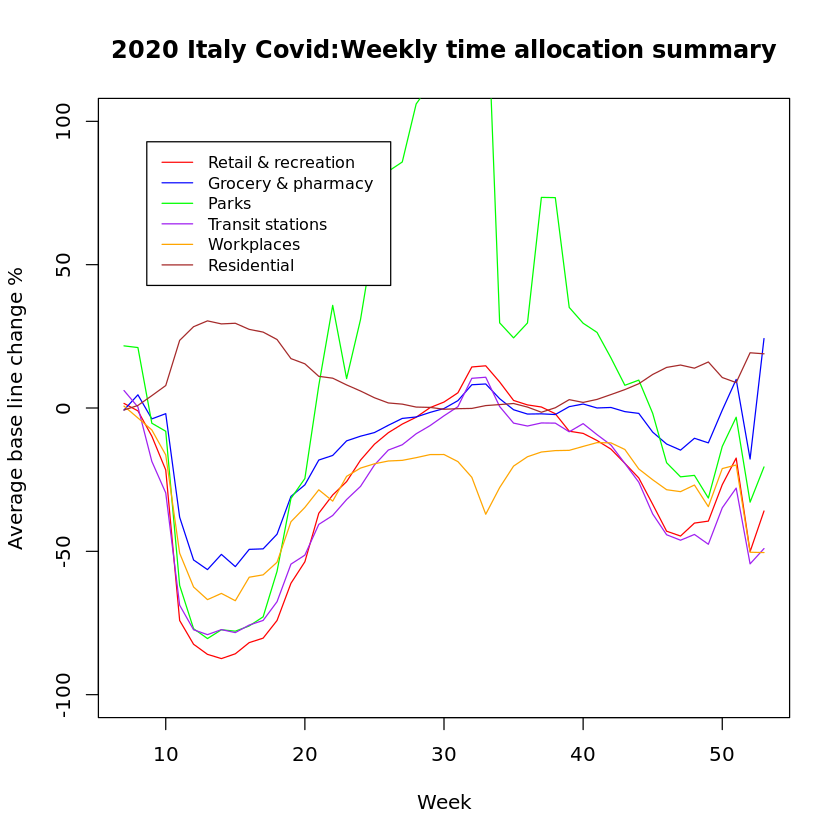

In [142]:
it["week"]<- week(it$date)
it["month"]<- month(it$date)

colours<- c("red", "blue", "green", "purple", "orange","brown") 
c<-1
 for (i in 8:13){#selected the ones with the percentage change
    it_ <- aggregate(it[i], list(it$week), FUN=mean, col = colours[c])
    if (c==1) {
        plot(it_[[1]], it_[[2]] , type ="l",          
             ylim =c(-100,100),
             col = colours[c],
             xlab = "Week",
             ylab = "Average base line change %",
             main = "2020 Italy Covid:Weekly time allocation summary"
             )
           }
    else{
        lines(it_[[1]],it_[[2]] , type ="l", col = colours[c])
    }
    c<- c+1
}
legend("topleft", 
       inset=0.07, 
       legend=c("Retail & recreation", "Grocery & pharmacy",
               "Parks", "Transit stations",
                "Workplaces", "Residential"
               ),
       col=colours, 
       lty=1:1, 
       cex=0.8,
       box.lty=1)    

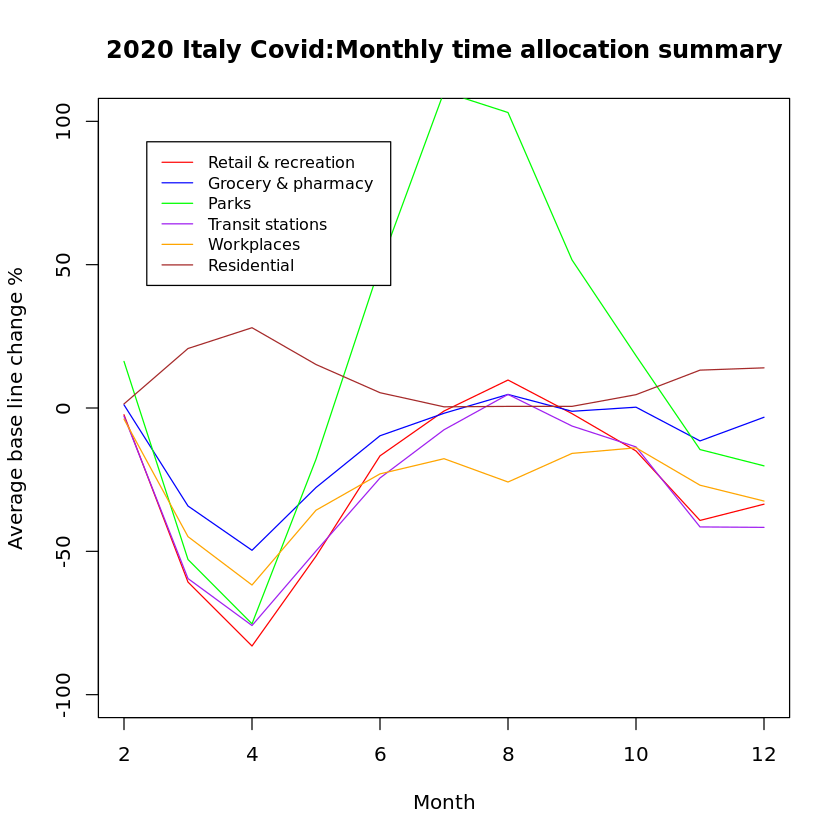

In [144]:
c<-1
 for (i in 8:13){#selected the ones with the percentage change
    it_ <- aggregate(it[i], list(it$month), FUN=mean, col = colours[c])
    if (c==1) {
        plot(it_[[1]], it_[[2]] , type ="l",
             ylim =c(-100,100),
             col = colours[c],
             xlab = "Month",
             ylab = "Average base line change %",
             main = "2020 Italy Covid:Monthly time allocation summary"
             )
           }
    else{
        lines(it_[[1]],it_[[2]] , type ="l", col = colours[c])
    }
    c<- c+1
}
legend("topleft", 
       inset=0.07, 
       legend=c("Retail & recreation", "Grocery & pharmacy",
               "Parks", "Transit stations",
                "Workplaces", "Residential"
               ),
       col=colours, 
       lty=1:1, 
       cex=0.8,
       box.lty=1)    

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex2"></a>  

### Exercise 2: Random number generators 

Von Neumann, middle square algorithm

Given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number

In [165]:
rmidsq<- function(x) {
    cat("x =", x, "\n")
    len_x<-  length(unlist(strsplit(as.character(x),"")))
    x.squared <- x**2
    cat("x_sq =", x.squared, "\n")
    number <- unlist(strsplit(as.character(x.squared),""))
    len_x2 <- length(number) #number of digits as the original number
    for (i in len_x:len_x2){#trim list until same digits
        if(len_x==length(number)){
            break
        }
        if((i %% 2) == 0) {
            number<-head(number, -1)
        } else {
            number<-tail(number, -1)
        }
        
    }
    return((as.numeric(paste(number, collapse=""))))
}
cat("middle square = ", rmidsq(12345))

x = 12345 
x_sq = 152399025 
middle square =  23990

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex3"></a>  

### Exercise 3: Bayesian Inference (Publishing)  

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.   

a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal? 

This is a Bernoulli process in that there are only two possible outcomes read the journal or not. Since we are looking at the sum of indepndent Bernoulli trials I would assume a Binomial distribution for y.
With 
$p=\frac{29}{150}$, $n=150$

b) Assuming a uniform prior, what is the posterior distribution for y?   

Uniform proir  
$$P(\pi \mid M) \sim \mathcal{U}(0,1)$$

The Likelihood  
$$P(y \mid p, n, M)=\left(\begin{array}{l}
n \\
y
\end{array}\right) \pi^{y}(1-\pi)^{n-y} \quad \text { with } \quad y \leq n$$

Posterior pdf is proportional to the Likelihood. The posterior distribution summarizes our belief about the parameter after having seen the data

$$P(\pi \mid y, n, M)=\frac{1}{Z} \pi^{y}(1-\pi)^{n-y}=\frac{1}{Z} P^{*}(\pi \mid y, n, M)$$

This means they must have comparable shapes and the posterior pdf is also binomial

c) Plot both posterior and likelihood ditributions functions

mean = 0.1973684

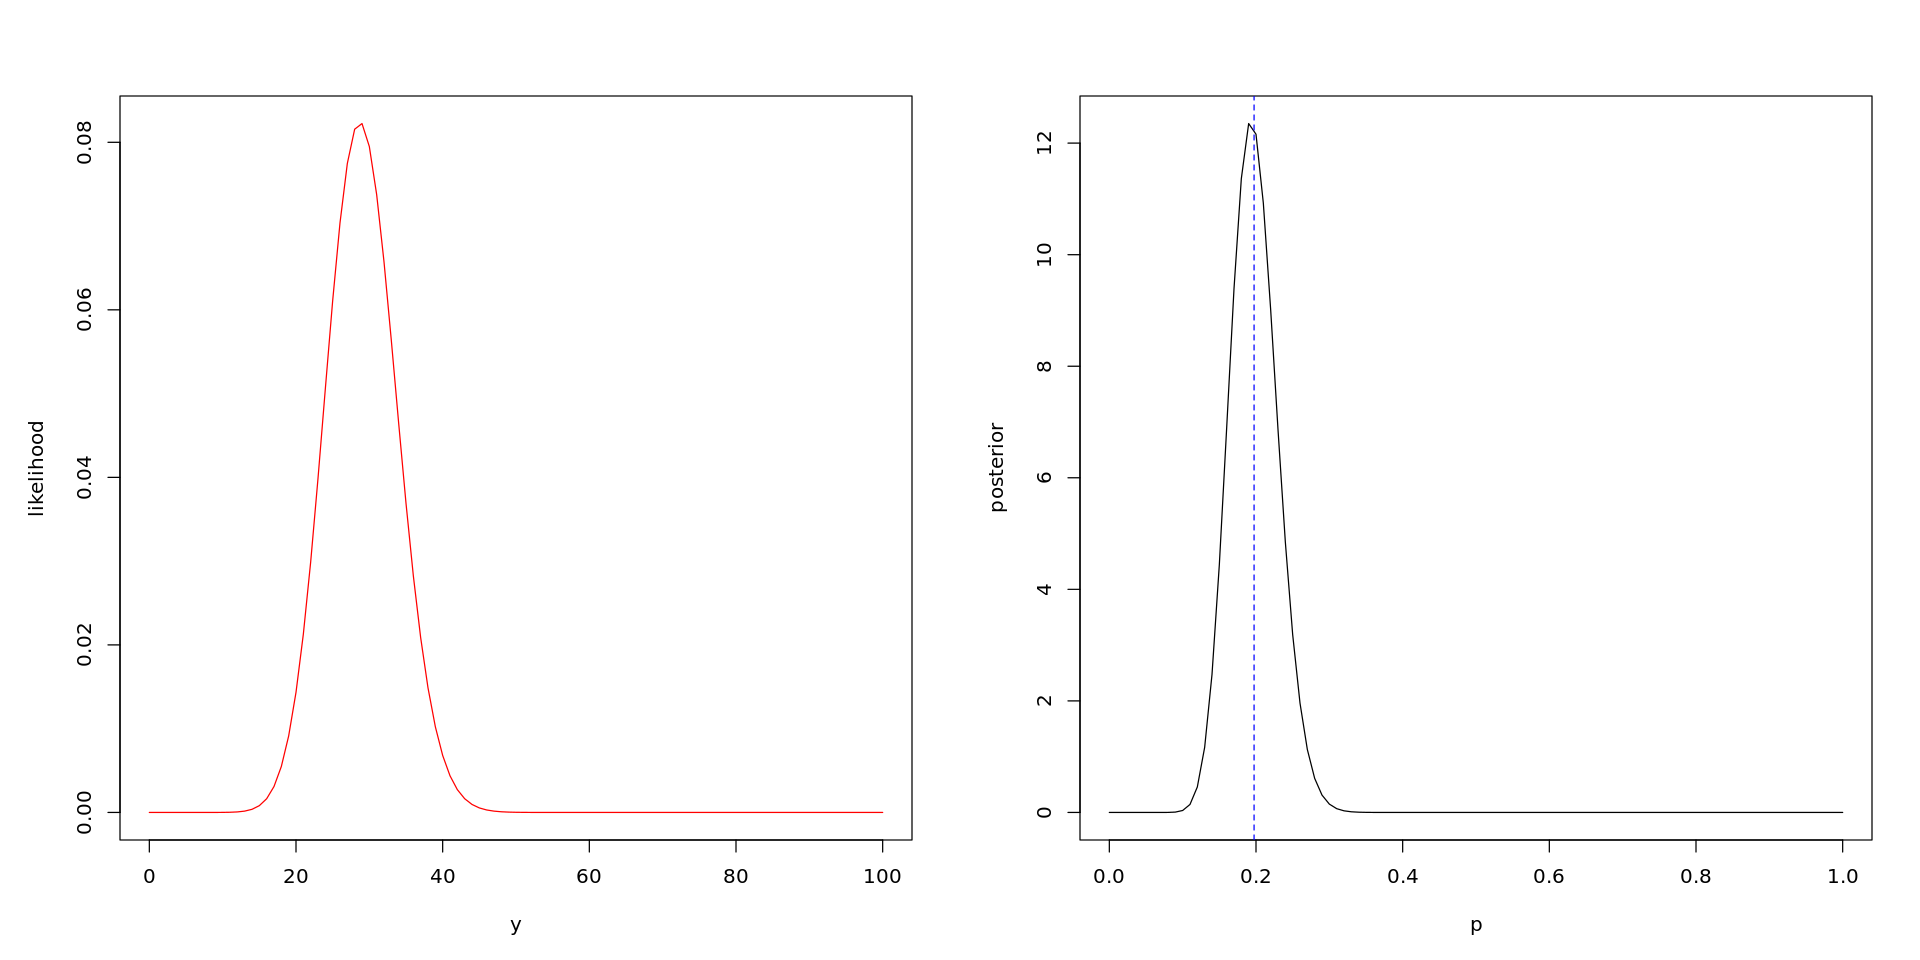

In [200]:
y<- seq(0,100, 1)
find_likelihood<- function(y){
    n <- 150
    r <- 29
    p <- r/n
    return(dbinom(x = y, size = n, prob = p))
}

likelihood <- find_likelihood(y)

find_posterior<- function(p){#integrateable now 
    n <- 150
    r <- 29
    return(dbinom(x = r, size = n, prob = p))
}

p <- seq(0,1, 0.01)
un_normalised_posterior <- find_posterior(p)
Z<- integrate(find_posterior, lower =0, upper =1)
posterior <- (1/Z$value)*un_normalised_posterior

mean <- 0.01* sum(p*posterior)
cat("mean =", mean)

options(repr.plot.width=16, repr.plot.height=8)  #to set graph size
par(mfrow=c(1,2),  mar=c(5, 5, 4, 2))            #graphs in the same row

plot(y, likelihood, col="red", type= "l")
plot(p, posterior , type ="l") 
abline(v=mean, col= "blue", lty=2)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex4"></a>  

### Exercise 4: Bayesian Inference (Coin)  

A coin is flipped $n = 30$ times with the following outcomes:

```
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H  
```
 
a) Assuming a flat prior , and a beta  prior. Plot the likelihood, prior and posterior distributions for the data set.  

#### Flat prior likelihood, prior and posterior distributions for the data set.

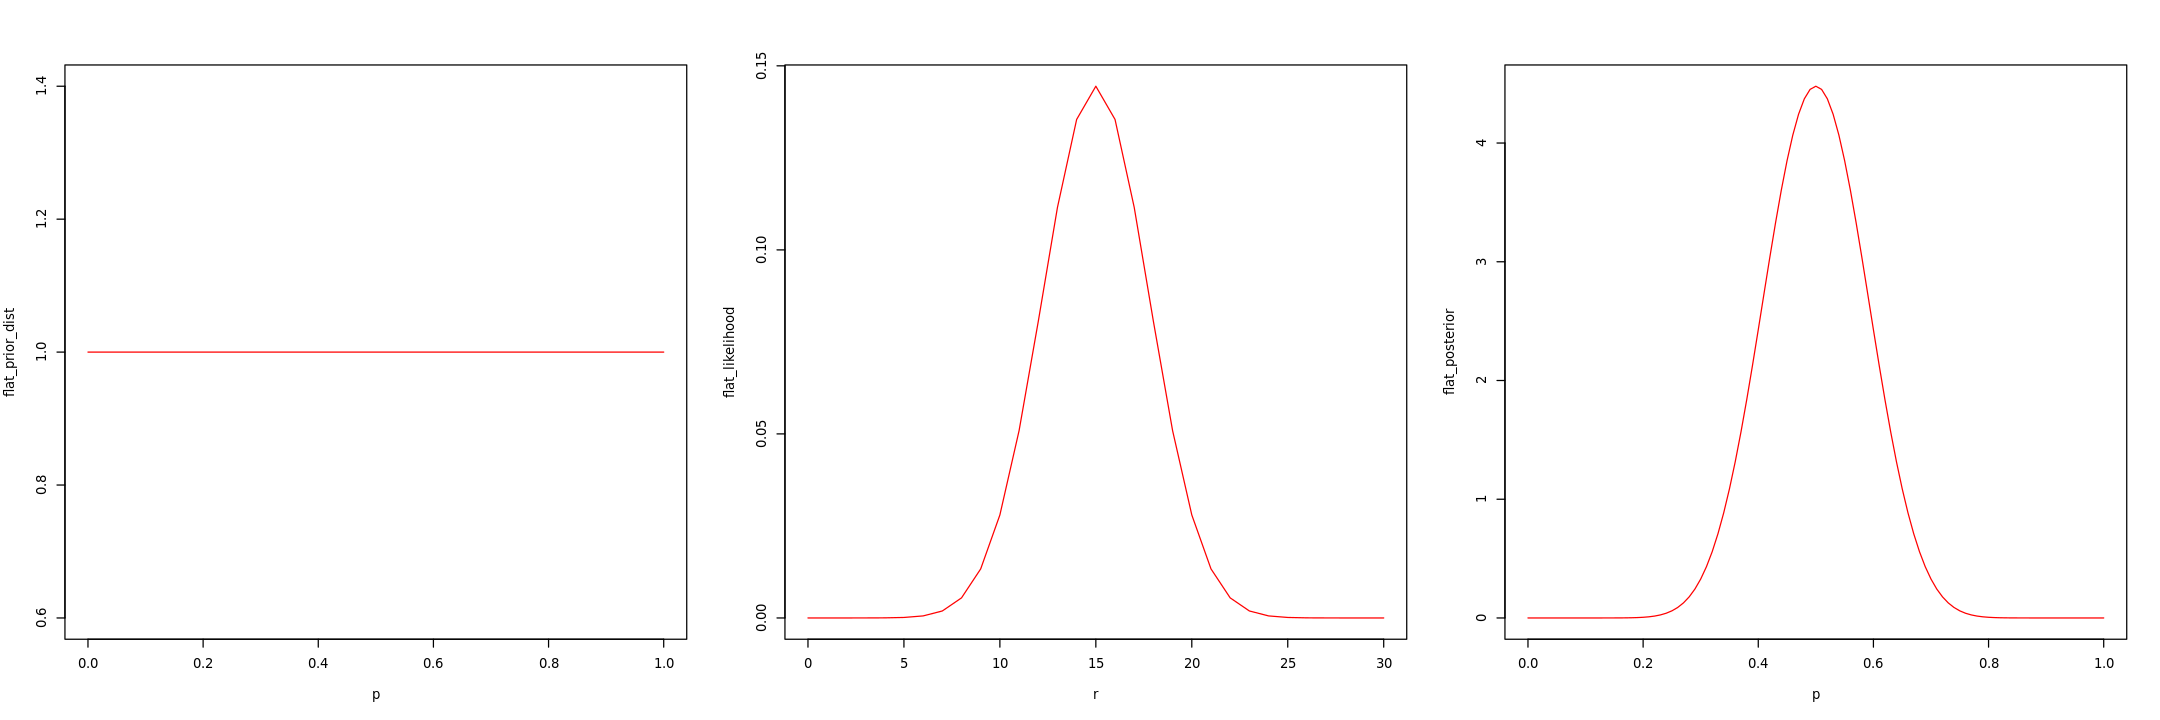

In [53]:
D <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", #Data 
       "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

heads <- length(D[D=="H"])
tails <- length(D[D=="T"])
r <- heads
n <-  heads + tails

dp <- 0.01
p  <- seq(0, 1, dp)
flat_prior_dist <- dunif(p)

x <- c(0:n)
flat_likelihood <- dbinom(x, size=n, prob=heads/n)

flat_unnorm_posterior   <- dbinom(x=r, size=n, prob=p)

flat_unnorm_posterior_funct <- function (p){
    return(dbinom(x=r, size=n, prob=p))
} 

Z <- integrate(flat_unnorm_posterior_funct, lower = 0, upper = 1)$value
flat_posterior <- flat_unnorm_posterior / Z

par(mfrow=c(1, 3))
options(repr.plot.width=18, repr.plot.height=6)

plot(p, flat_prior_dist , type="l", col= "red")
plot(x, flat_likelihood, xlab="r", type="l", col= "red" )
plot(p, flat_posterior, type ="l", col = "red")

#### Beta prior , $X ∼ Beta(\alpha ,\beta)$

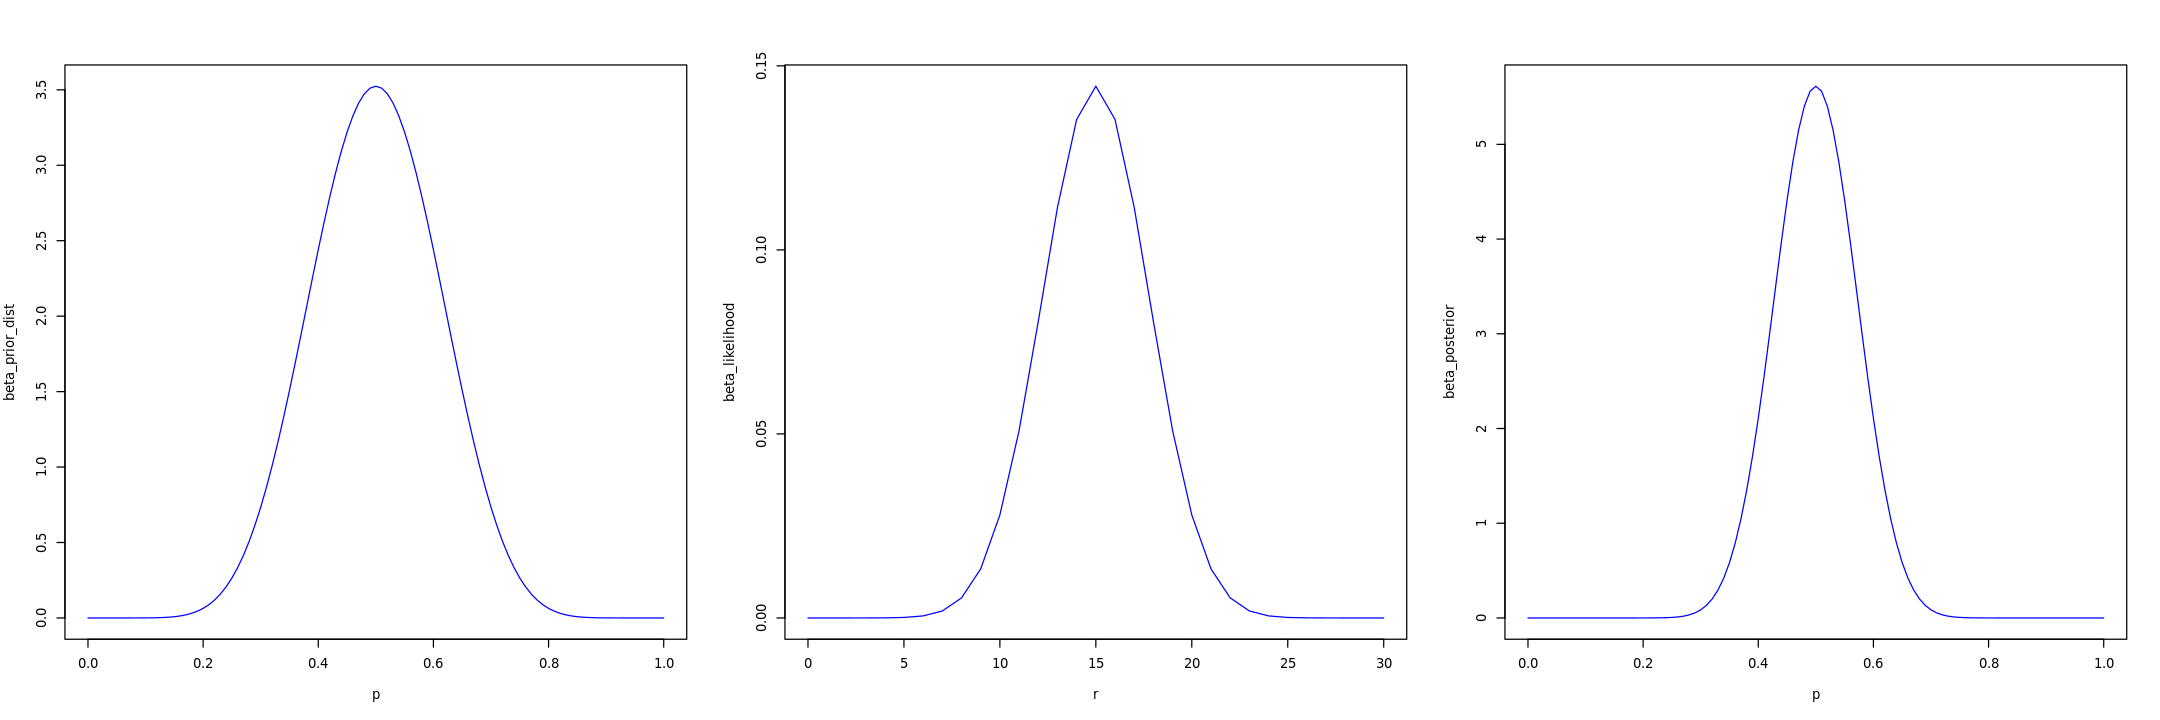

In [50]:
alpha <- 10
beta  <- 10

dp       <- 0.01
p        <- seq(0, 1, dp)

beta_prior_dist    <- dbeta(p, shape1=alpha, shape2=beta)

x <- c(0:n)
beta_likelihood <- dbinom(x, size=n, prob=heads/n)

beta_unnorm_posterior   <- dbinom(x=r, size=n, prob=p) * beta_prior_dist

beta_unnorm_posterior_fun <- function (p){#simple for intergration
    r <- 15
    n <- 30
    return(dbeta(p, shape1=alpha, shape2=beta)*dbinom(x=r, size=n, prob=p)) 
}

Z<- integrate(beta_unnorm_posterior_fun, lower=0, upper=1)$value
beta_posterior  <- beta_unnorm_posterior/Z

par(mfrow=c(1, 3))
options(repr.plot.width=18, repr.plot.height=6)

plot(p, beta_prior_dist , type="l", col= "blue")
plot(x, beta_likelihood, xlab="r", type="l", col= "blue" )
plot(p, beta_posterior, type ="l", col = "blue")

#### Flat vs Beta comparision 

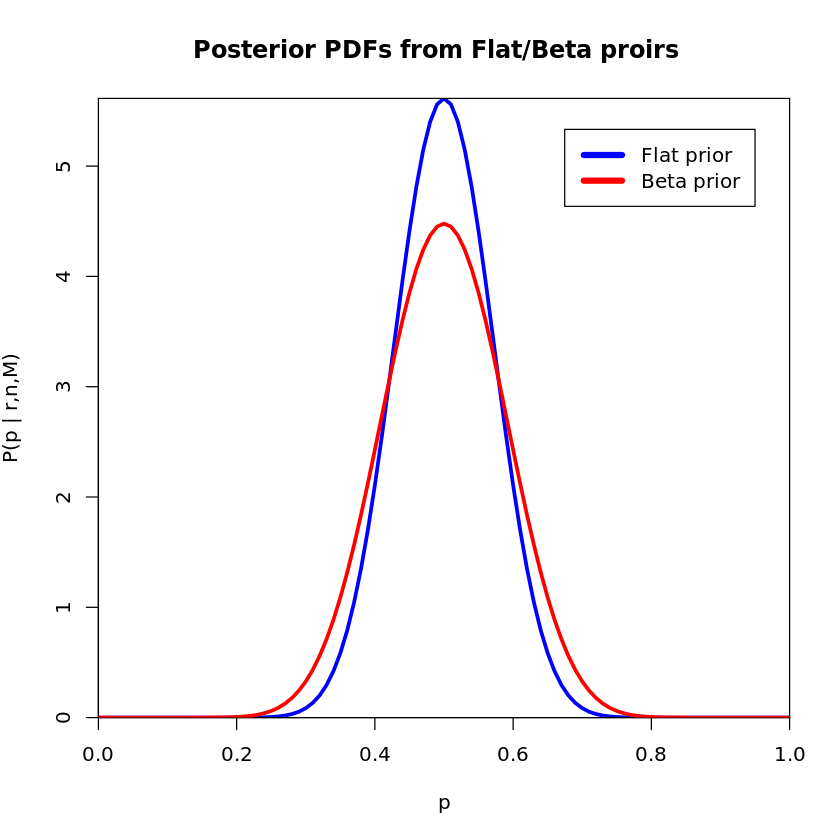

In [54]:
options(repr.plot.width=7, repr.plot.height=7)

plot(p, beta_posterior, 
     xaxs='i', yaxs='i', col='blue', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylab=expression(paste("P","(p | r,n,M)")),
     main='Posterior PDFs from Flat/Beta proirs  ')
lines(p, flat_posterior , col='red',lwd=3, lty=1)

legend("topright",
       inset=0.05, 
       legend=c("Flat prior","Beta prior"),
       col=c("blue", "red"), 
       cex=1,
       box.lty=1,
       lwd=5)

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.  

flat mode  =  0.5 , beta mode =  0.5

[1] 0.331

[1] 0.669

[1] 0.364

[1] 0.636

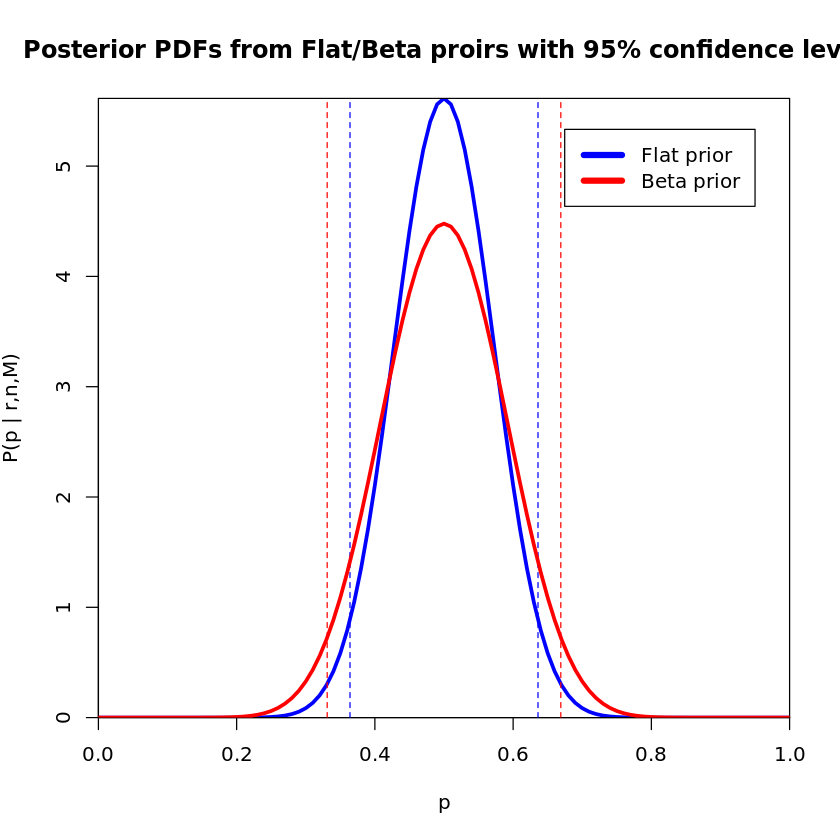

In [62]:
flat_mode <- p[which.max(flat_posterior)]
beta_mode <- p[which.max(beta_posterior)]

cat("flat mode  = ", flat_mode, ", beta mode = ", beta_mode)

flat_post<- function(p){
    flat_unnorm_posterior   <- dbinom(x=r, size=n, prob=p)
    Z <- integrate(flat_unnorm_posterior_funct, lower = 0, upper = 1)$value
    flat_posterior <- flat_unnorm_posterior / Z
    return(flat_posterior)
}

for (i in seq(0,0.5,0.001)){
    I_flat <- integrate(flat_post,lower = 0, upper = i)
    if (I_flat$value >= 0.025){
        flat_CI_low <- i
        break}
}

flat_CI_low 
flat_CI_high<- 1- flat_CI_low # As symetric  
flat_CI_high


beta_unnorm_posterior_fun <- function (p){
    r <- 15
    n <- 30
    return(dbeta(p, shape1=alpha, shape2=beta)*dbinom(x=r, size=n, prob=p)) 
}

beta_post<- function(p){
    beta_prior_dist    <- dbeta(p, shape1=alpha, shape2=beta)
    beta_unnorm_posterior   <- dbinom(x=r, size=n, prob=p) * beta_prior_dist
    Z<- integrate(beta_unnorm_posterior_fun, lower=0, upper=1)$value #same as before
    beta_posterior  <- beta_unnorm_posterior/Z
    return(beta_posterior)
}

for (i in seq(0,0.5,0.001)){
    I_post <- integrate(beta_post,lower = 0, upper = i)
    if (I_post$value >= 0.025){
        post_CI_low <- i
        break}
}

post_CI_low 
post_CI_high<- 1- post_CI_low # Assumed sysmetric to save space but it is the exact same process but with 0.975 in if statment
post_CI_high




plot(p, beta_posterior, 
     xaxs='i', yaxs='i', col='blue', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylab=expression(paste("P","(p | r,n,M)")),
     main='Posterior PDFs from Flat/Beta proirs with 95% confidence level')

abline(v=post_CI_low,  col= "blue", lty=2)
abline(v=post_CI_high, col= "blue", lty=2)

lines(p, flat_posterior , col='red',lwd=3, lty=1)
abline(v=flat_CI_low,  col= "red", lty=2)
abline(v=flat_CI_high, col= "red", lty=2)

legend("topright",
       inset=0.05, 
       legend=c("Flat prior","Beta prior"),
       col=c("blue", "red"), 
       cex=1,
       box.lty=1,
       lwd=5)

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).  

n =  1 , mode  0.47 95% C.I between p = 0.272 and  0.728 
n =  2 , mode  0.45 95% C.I between p = 0.258 and  0.742 
n =  3 , mode  0.43 95% C.I between p = 0.244 and  0.756 
n =  4 , mode  0.41 95% C.I between p = 0.232 and  0.768 
n =  5 , mode  0.39 95% C.I between p = 0.222 and  0.778 
n =  6 , mode  0.42 95% C.I between p = 0.245 and  0.755 
n =  7 , mode  0.4 95% C.I between p = 0.234 and  0.766 
n =  8 , mode  0.38 95% C.I between p = 0.224 and  0.776 
n =  9 , mode  0.41 95% C.I between p = 0.245 and  0.755 
n =  10 , mode  0.43 95% C.I between p = 0.265 and  0.735 
n =  11 , mode  0.41 95% C.I between p = 0.255 and  0.745 
n =  12 , mode  0.4 95% C.I between p = 0.246 and  0.754 
n =  13 , mode  0.42 95% C.I between p = 0.264 and  0.736 
n =  14 , mode  0.44 95% C.I between p = 0.282 and  0.718 
n =  15 , mode  0.45 95% C.I between p = 0.298 and  0.702 
n =  16 , mode  0.44 95% C.I between p = 0.289 and  0.711 
n =  17 , mode  0.46 95% C.I between p = 0.305 and  0.695 
n =  18 

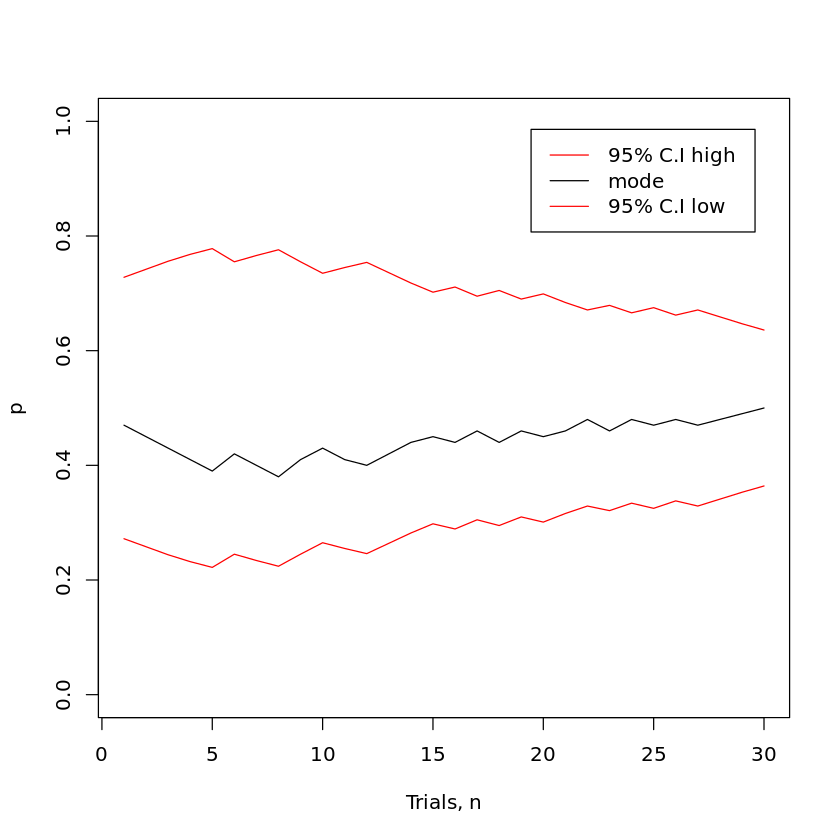

In [126]:
D <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H",  
       "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")
t <- 0
h <- 0

v_lowCI <- vector()
v_mode <- vector()
for (n in 1:length(D)){
    D_n<-D[1:n]
    heads <- length(D_n[D_n=="H"])
    tails <- length(D_n[D_n=="T"])
    r <- heads
    likelihood_prior <- function(p){# in loop to update r 
        #likelihood x prior
    dbeta(p, shape1=alpha, shape2=beta)*dbinom(x=r, size=n, prob=p)    
    }
    Z<- integrate(likelihood_prior, lower = 0, upper = 1)$value
    posterior_funct <- function(p){
        1/Z* likelihood_prior(p)
    }
    posterior <- posterior_funct(p)
    mode <- p[which.max(posterior)]
    v_mode <- c(v_mode, mode)
    for (i in seq(0,0.5,0.001)){
        I <- integrate(posterior_funct,lower = 0, upper = i)
        if (I$value >= 0.025){
            lowCI <- i
            break
        }
    }
    cat("n = ",n, ", mode ", mode, "95% C.I between p =", lowCI, "and ",(1-lowCI), "\n")
    v_lowCI <- c(v_lowCI,lowCI)   
}
trials<- 1:length(D)
plot(trials, 1-v_lowCI, col="red",  
     type = 'l', 
     ylim = c(0,1),
     ylab = "p",
     xlab = 'Trials, n')
lines(trials, v_lowCI, type = 'l', col = 'red')
lines(trials, v_mode, type = 'l')
legend("topright",
       inset=0.05, 
       legend=c("95% C.I high","mode", "95% C.I low"),
       col=c("red", "black", "red"), 
       cex=1,
       box.lty=1,
       lwd=1)

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

As the knowledge of the dataset increases, I expect that the credibility intervals become narrower and the mode should approach the "true" value  of $\mu=0.5$. This trend whilst not finished is shown above.